In [27]:
import cv2
from google.colab import files
import numpy as np
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import re
import scipy
import scipy.stats as stats
from scipy.io import loadmat
import seaborn as sb
import plotly.graph_objects as go

import sklearn
from sklearn import manifold
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding as LaplacianEigenmap
from sklearn.neighbors import kneighbors_graph

    
import sys
import time


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problem 2

## 1.

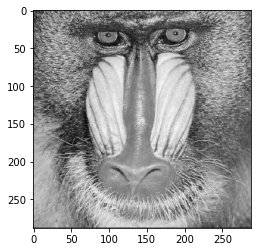

In [28]:
img = cv2.imread('/content/drive/MyDrive/2022 files/CS 584/CS584 - Assignment 4/mandrill_color.png')
X   = np.mean(img, axis=2)
plt.imshow(X, cmap='gray')
plt.show()

## 2.

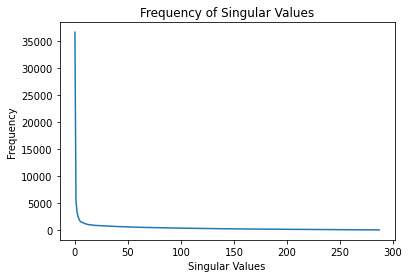

In [29]:
XtX = np.asmatrix(np.matmul(X.T, X))

e_vals,e_vecs = np.linalg.eig(XtX)
idx           = e_vals.argsort()[::-1]   
singulars     = np.sqrt(e_vals[idx])
e_vecs        = e_vecs[:,idx]
e_vals        = sorted(e_vals,reverse=True)

V = np.asmatrix(e_vecs)
S = np.diag(singulars)
U = np.matmul(np.matmul(X,V),np.linalg.inv(S))

plt.plot(singulars)
plt.xlabel('Singular Values')
plt.ylabel('Frequency')
plt.title('Frequency of Singular Values')
plt.show()

## 3.

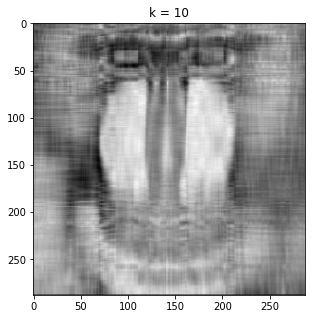

Compression ratio when k=10: 0.07


In [30]:

# def compression_ratio(k,compressed):
#     m,n = X.shape
#     compression_ratio = np.round((k*(m+n+1))/(m*n),3)
#     return compression_ratio


k=10
compressed = U[:, :k] @ np.diag(list(singulars)[:k]) @ V.T[:k,:]
m,n = compressed.shape
compression_ratio = np.round((k*(m+n+1))/(m*n),3)

plt.figure(figsize=(5,5))
plt.imshow(compressed, cmap='gray'),
plt.title(f'k = {k}')
plt.show()
k=10
print('Compression ratio when k={}: {}'.format(k,compression_ratio))

## 4.

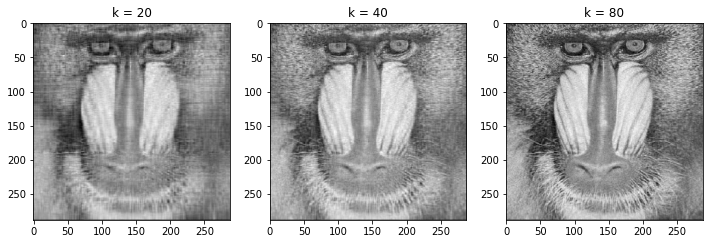

,k=20,k=40,k=80
,,,
Compression Ratio,0.139,0.278,0.557




The reconstructed image looks pretty close to the original when k = 80, so there is no need to increase k any more.


In [31]:
k = [20,40,80]
plt.figure(figsize=(12, 12))

crs = []
for i in range(len(k)):
    compressed = U[:, :k[i]] @ np.diag(list(singulars)[:k[i]]) @ V.T[:k[i],:]#V[:k[i], :]
    m,n        = compressed.shape
    cr         = np.round((k[i]*(m+n+1))/(m*n),3)
    crs.append(cr)

    plt.subplot(2, 3, i+1),
    plt.imshow(compressed, cmap='gray'),
    plt.title(f'k = {k[i]}')
plt.show()
print('\n\n')

dict_ = {'':['Compression Ratio'], 'k=20':crs[0], 'k=40':crs[1], 'k=80':crs[2]}
display(pd.DataFrame(dict_).set_index(''))
print("\n\nThe reconstructed image looks pretty close to the original when k = 80, so there is no need to increase k any more.")

# Problem 3


## 1.

In [32]:
places_file = '/content/drive/MyDrive/2022 files/CS 584/CS584 - Assignment 4/places.rtf'

columns  = ['climate', 'housing', 'healthcare', 'crime', 'transportation', 'education',
            'arts', 'recreation', 'economic welfare', 'c1', 'c2', 'c3', 'c4', 'c5']
columns_ = ['City'] + columns
col_data = [[]]*10
places_dict = dict(zip(columns_,col_data))

with open(places_file) as f:
  lines = f.readlines()
  lines = [l for l in lines if l[0].lower() in 'abcdefghijklmnopqrstuvwxyz']

for line in lines:
  line = re.sub(r'[\s\n\t\\]+',' ',line).split(' ')
  line = [int(line[i]) if i > 0 else line[i] for i in range(10)]
  for j in range(10):
    places_dict[columns_[j]] = places_dict[columns_[j]] + [line[j]]


places_data = pd.DataFrame(places_dict).set_index('City')
display(places_data.head())

,climate,housing,healthcare,crime,transportation,education,arts,recreation,economic welfare
City,,,,,,,,,
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727
"Alexandria,LA",520,5819,640,727,2444,2972,334,1018,5254


## 2.

In [33]:
X_log = np.log10(places_data)
display(X_log.head())

,climate,housing,healthcare,crime,transportation,education,arts,recreation,economic welfare
City,,,,,,,,,
"Akron,OH",2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489
"Albany,GA",2.670246,3.865637,2.790988,2.986772,3.403292,3.408240,2.374748,2.933993,3.720159
"Albany-Schenectady-Troy,NY",2.677607,3.898067,3.155640,2.785330,3.837778,3.531351,3.667920,3.208710,3.768194
"Albuquerque,NM",2.818885,3.923917,3.267875,3.171141,3.816771,3.480869,3.652826,3.416973,3.757927
"Alexandria,LA",2.716003,3.764848,2.806180,2.861534,3.388101,3.473049,2.523746,3.007748,3.720490


## 3.

In [34]:
X_mat = np.asarray(X_log)
x_bar = np.array([np.mean(c) for c in X_mat.T])
X_std = X_mat - np.mean(X_mat, axis = 0)

C = np.matmul(X_std.T,X_std)
e_vals,e_vecs = np.linalg.eig(C)
idx           = e_vals.argsort()[::-1]   
e_vecs        = np.round(e_vecs[:,idx],3)
e_vals        = np.round(sorted(e_vals,reverse=True),3)

## 4.

In [35]:
PC1,PC2 = e_vecs[:,0],e_vecs[:,1]
print('PC1:\n{}\n\nPC2:\n{}\n\n'.format(PC1,PC2))
i1,i2 = list(np.abs(PC1)).index(max(np.abs(PC1))),list(np.abs(PC2)).index(max(np.abs(PC2)))
f1,f2 = columns[i1],columns[i2]
print(('The most important features correspond to the largest absolute values in'
    + ' the principal\ncomponents.In PC1 and PC2, the largest absolute values'
    + ' are at indices {} and {}, respectively,\nwhere the first index is 0.'
    + ' These correspond to features {} and {}, i.e., {}\nand {}.').
    format(i1,i2,i1,i2,f1,f2))

PC1:
[0.035 0.093 0.406 0.101 0.15  0.032 0.875 0.159 0.02 ]

PC2:
[-0.009 -0.012  0.857 -0.222 -0.058  0.062 -0.3   -0.341 -0.053]


The most important features correspond to the largest absolute values in the principal
components.In PC1 and PC2, the largest absolute values are at indices 6 and 2, respectively,
where the first index is 0. These correspond to features 6 and 2, i.e., arts
and healthcare.


## 5.

In [36]:
x_scores = [[x[i1] for x in X_std.tolist()],[x[i2] for x in X_std.tolist()]]
PCs      = e_vecs[:,:2]
PC_mat   = np.dot(PCs.T, X_std.T).T
PC_df    = pd.DataFrame(PC_mat, columns=['PC1','PC2'])

fig = go.Figure(data=go.Scatter(x=places_data.iloc[:,i1],
                                y=places_data.iloc[:,i2],
                                mode='text',
                                text=places_data.index))
fig.update_layout(title={'text': "Before PCA",
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top',
                         'font':dict(size=18)},
                  xaxis_title=columns[i1],
                  yaxis_title=columns[i2],
                  font=dict(size=8),
                  width=800,height=500)
fig.show()


fig = go.Figure(data=go.Scatter(x=PC_df['PC1'],
                                y=PC_df['PC2'],
                                mode='text',
                                text=places_data.index))
fig.update_layout(title={'text': "After PCA",
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top',
                         'font':dict(size=18)},
                  xaxis_title='PC1',
                  yaxis_title='PC2',
                  font=dict(size=8),
                  width=800,height=500)
fig.show()

Before applying PCA, New York City is a clear outlier. This isn't the case after PCA.

## 6.

In [37]:
X = pd.DataFrame(places_data.apply(stats.zscore,axis=0)).iloc[:,:9]
display(X.head())

X_mat = np.asarray(X)
C     = np.matmul(X_mat.T,X_mat)

e_vals,e_vecs = np.linalg.eig(C)
idx           = e_vals.argsort()[::-1]   
e_vecs        = np.round(e_vecs[:,idx],3)
e_vals        = np.round(sorted(e_vals,reverse=True),3)

PC1,PC2 = e_vecs[:,0],e_vecs[:,1]
i1,i2   = list(np.abs(PC1)).index(max(np.abs(PC1))),list(np.abs(PC2)).index(max(np.abs(PC2)))
f1,f2   = columns[i1],columns[i2]
print('PC1:\n{}\n(Associated with {})\nPC2:\n{}\n(Associated with {})\n'.format(PC1,f1,PC2,f2))


,climate,housing,healthcare,crime,transportation,education,arts,recreation,economic welfare
City,,,,,,,,,
"Akron,OH",0.299769,-0.090292,0.466609,-0.210475,0.463339,-1.175471,0.518568,0.971738,-1.084171
"Albany,GA",-0.585961,-0.425681,-0.569703,0.024722,-1.157450,-0.795144,-0.629306,-1.223873,-0.249436
"Albany-Schenectady-Troy,NY",-0.519738,-0.186837,0.241975,-0.983264,1.841560,1.820380,0.322694,-0.285196,0.320038
"Albuquerque,NM",0.995109,0.016747,0.663288,1.461101,1.617599,0.657578,0.288433,0.946971,0.192973
"Alexandria,LA",-0.155513,-1.063718,-0.547739,-0.655669,-1.217402,0.489237,-0.608404,-1.026974,-0.245726


PC1:
[-0.206 -0.356 -0.46  -0.281 -0.351 -0.275 -0.463 -0.328 -0.139]
(Associated with arts)
PC2:
[ 0.218  0.254 -0.3    0.351 -0.182 -0.484 -0.196  0.384  0.47 ]
(Associated with education)



In [39]:
z_data = pd.DataFrame(places_data.apply(stats.zscore,axis=0))

#####

fig = go.Figure(data=go.Scatter(x=z_data.iloc[:,0],
                                y=z_data.iloc[:,1],
                                mode='text',
                                text=z_data.index))
fig.update_layout(title={'text': "Before PCA",
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top',
                         'font':dict(size=18)},
                  xaxis_title=columns[0],
                  yaxis_title="X2",
                  font=dict(size=8),
                  width=800,
                  height=500)
fig.show()

#####

X_z    = np.asmatrix(z_data)
C      = np.matmul(X_z.T,X_z)

e_vals, e_vecs   = np.linalg.eig(C)
idx              = np.argsort(e_vals)[::-1]
e_vals_, e_vecs_ = e_vals[idx], e_vecs[:,idx]

PCs      = e_vecs[:,:2]
PC1, PC2 = PCs[:,0],PCs[:,1]
print('PC1:\n{}\n\nPC2:\n{}\n\n'.format(PC1,PC2))

PC_mat = np.dot(PCs.T , X_z.T).T
PC_df  = pd.DataFrame(PC_mat, columns=['PC1','PC2'])

#####

fig = go.Figure(data=go.Scatter(x=PC_df.iloc[:,0],
                                y=PC_df.iloc[:,1],
                                mode='text',
                                text=places_data.index))
fig.update_layout(title={'text': "After PCA",
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top',
                         'font':dict(size=18)},
                  xaxis_title="PC1",
                  yaxis_title="PC2",
                  font=dict(size=8),
                  width=800,
                  height=500)
fig.show()

PC1:
[[-0.20597624]
 [-0.35640757]
 [-0.45991451]
 [-0.28148136]
 [-0.35096481]
 [-0.27519246]
 [-0.46271437]
 [-0.32763525]
 [-0.13941911]]

PC2:
[[ 0.2179069 ]
 [ 0.254412  ]
 [-0.29980915]
 [ 0.35118173]
 [-0.18240488]
 [-0.48383877]
 [-0.19631688]
 [ 0.3844578 ]
 [ 0.46995465]]




When I computed the base-10 logarithm, the data initially showed NYC as an outlier before PCA, but not after. Here, it is the opposite.

# Problem 4

## 1.

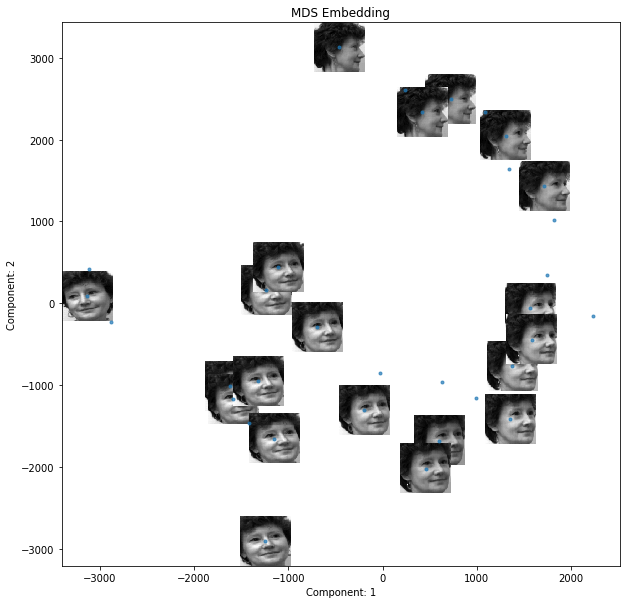

In [42]:
faces    = loadmat('/content/drive/MyDrive/2022 files/CS 584/CS584 - Assignment 4/face.mat')
faces_   = faces['Y']
s1,s2,s3 = faces_.shape
faces_   = faces_.reshape(s1*s2,s3)
df       = pd.DataFrame(faces_).T

mds              = manifold.MDS(n_components=2)
manifold_mat_mds = mds.fit_transform(df)
manifold_df_mds  = pd.DataFrame(manifold_mat_mds, columns=['Component 1', 'Component 2'])

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('MDS Embedding')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
x_size = (max(manifold_df_mds['Component 1']) - min(manifold_df_mds['Component 1']))*0.1
y_size = (max(manifold_df_mds['Component 2']) - min(manifold_df_mds['Component 2']))*0.1
for i in range(num_images):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_df_mds.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_df_mds.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_df_mds.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_df_mds.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(s1, s2)
    ax.imshow(img,
              aspect='auto',
              cmap=plt.cm.gray, 
              interpolation='nearest',
              extent=(x0, x1, y0, y1))

ax.scatter(manifold_df_mds['Component 1'], manifold_df_mds['Component 2'], marker='.',alpha=0.7)
plt.show()

## 2.

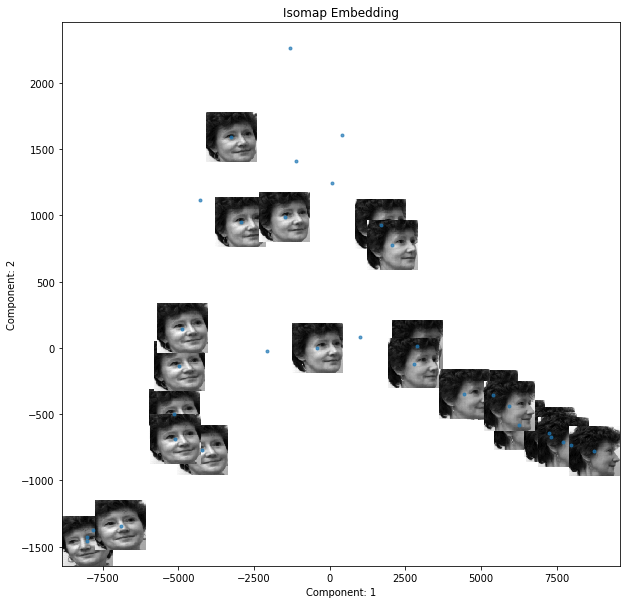

The Isomap Embedding results in a trend that is 'unrolled' compared
to the MDS Embedding.


In [44]:
iso = manifold.Isomap(n_neighbors=5, n_components=2)
iso.fit(df)
manifold_mat_iso = iso.transform(df)
manifold_df_lle  = pd.DataFrame(manifold_mat_iso, columns=['Component 1', 'Component 2'])

num_images, num_px = df.shape

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('Isomap Embedding')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
x_size = (max(manifold_df_lle['Component 1']) - min(manifold_df_lle['Component 1']))*0.1
y_size = (max(manifold_df_lle['Component 2']) - min(manifold_df_lle['Component 2']))*0.1
for i in range(num_images):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_df_lle.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_df_lle.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_df_lle.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_df_lle.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(s1, s2)
    ax.imshow(img,
              aspect='auto',
              cmap=plt.cm.gray, 
              interpolation='nearest',
              extent=(x0, x1, y0, y1))

ax.scatter(manifold_df_lle['Component 1'], manifold_df_lle['Component 2'], marker='.',alpha=0.7)
plt.show()
print("The Isomap Embedding results in a trend that is \'unrolled\' compared\n"
     +"to the MDS Embedding.")

## 3.

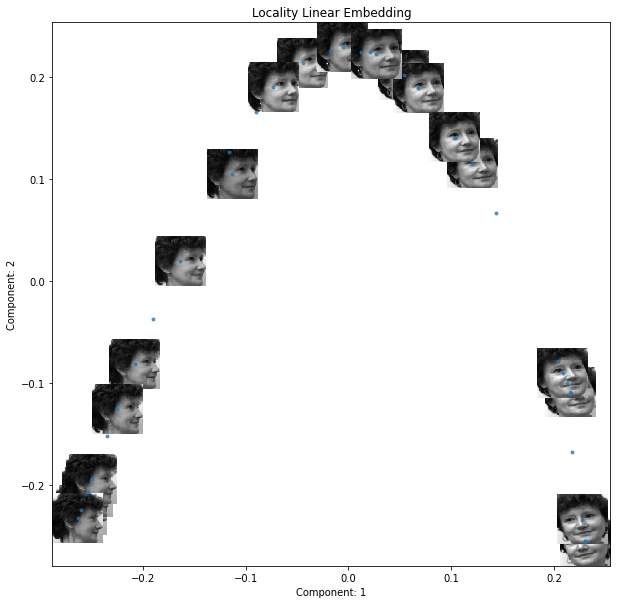

The Locality Linear Embedding results in a trend clearly resembles a
parabola, exhibiting the clearest trend yet.


In [45]:
lle = manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=2)
lle.fit(df)
manifold_mat_lle = lle.transform(df)
manifold_df_lle  = pd.DataFrame(manifold_mat_lle, columns=['Component 1', 'Component 2'])

num_images, num_px = df.shape

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('Locality Linear Embedding')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
x_size = (max(manifold_df_lle['Component 1']) - min(manifold_df_lle['Component 1']))*0.1
y_size = (max(manifold_df_lle['Component 2']) - min(manifold_df_lle['Component 2']))*0.1
for i in range(num_images):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_df_lle.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_df_lle.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_df_lle.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_df_lle.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(s1, s2)
    ax.imshow(img,
              aspect='auto',
              cmap=plt.cm.gray, 
              interpolation='nearest',
              extent=(x0, x1, y0, y1))

ax.scatter(manifold_df_lle['Component 1'], manifold_df_lle['Component 2'], marker='.',alpha=0.7)
plt.show()
print("The Locality Linear Embedding results in a trend clearly resembles a\n"
    + "parabola, exhibiting the clearest trend yet.")

## 4.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



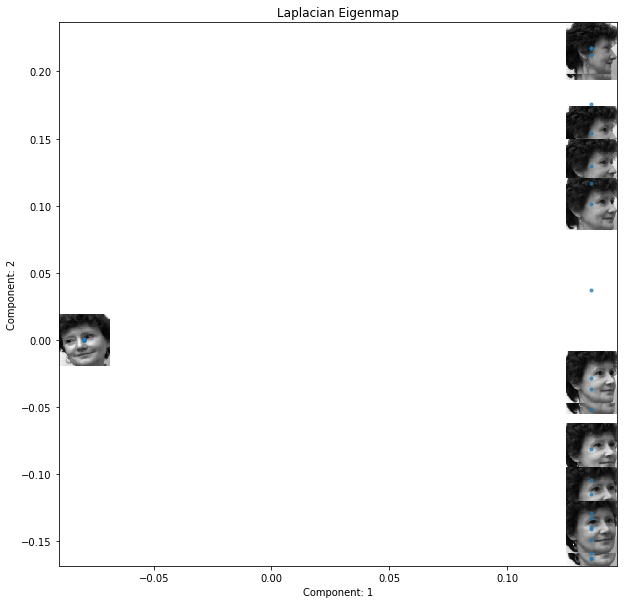

The Laplacian Eigenmap results in the only (almost) linear trend.


In [46]:
#adjacency = kneighbors_graph(faces_.T, 5, mode='connectivity', include_self=True)
le              = LaplacianEigenmap(affinity='nearest_neighbors',n_components=2)
manifold_mat_le = le.fit_transform(faces_.T)
manifold_df_le  = pd.DataFrame(manifold_mat_le, columns=['Component 1', 'Component 2'])

num_images, num_px = df.shape

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('Laplacian Eigenmap')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
x_size = (max(manifold_df_le['Component 1']) - min(manifold_df_le['Component 1']))*0.1
y_size = (max(manifold_df_le['Component 2']) - min(manifold_df_le['Component 2']))*0.1
for i in range(num_images):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_df_le.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_df_le.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_df_le.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_df_le.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(s1, s2)
    ax.imshow(img,
              aspect='auto',
              cmap=plt.cm.gray, 
              interpolation='nearest',
              extent=(x0, x1, y0, y1))

ax.scatter(manifold_df_le['Component 1'], manifold_df_le['Component 2'], marker='.',alpha=0.7)
plt.show()
print("The Laplacian Eigenmap results in the only (almost) linear trend.")

# Problem 5

## 1.

In [47]:
n=10
d=5000
X   = np.identity(d)[:,:10]
eps = 0.1
m   = int(np.ceil(4*math.log(n)/(eps**2)))
print("m = {}".format(m))
print("Rounded to the next integer: m = {}".format(m))

m = 922
Rounded to the next integer: m = 922


## 2.

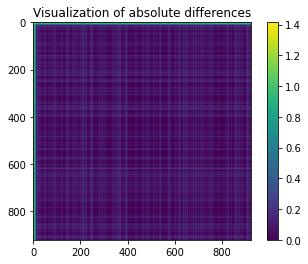

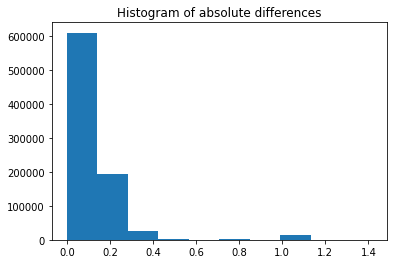



The Lemma seems to hold, mostly.


In [18]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.random_projection import SparseRandomProjection

projector = SparseRandomProjection(n_components=m,eps=0.1)
A = projector.fit_transform(X.T)
dist_og = euclidean_distances(X[:m,:])
dist_new = euclidean_distances(A.T)
diff = np.abs(dist_og-dist_new)


plt.imshow(diff)
plt.colorbar()
plt.title('Visualization of absolute differences')
plt.show()

plt.hist(diff.flatten())
plt.title('Histogram of absolute differences')
plt.show()

print("\n\nThe Lemma seems to hold, mostly.")

## 3.

In [25]:
def JL(n,d,m,eps,plot=True):
  X = np.identity(d)[:,:n]

  projector = SparseRandomProjection(n_components=m,eps=eps)
  A = projector.fit_transform(X.T)
  dist_og = euclidean_distances(X[:m,:])
  dist_new = euclidean_distances(A.T)
  diff = np.abs(dist_og-dist_new)

  if plot==True:
    plt.imshow(diff)
    plt.colorbar()
    plt.title('Visualization of absolute differences')
    plt.show()

    plt.hist(diff.flatten())
    plt.title('Histogram of absolute differences')
    plt.show()

  diff = diff.flatten()
  good = len(diff[diff<=0.2])
  total = len(diff)
  p = np.round(100*good/total,3)
  if p > 70:
    return False
  else:
    print('\n\nThe lemma does not hold for n={}, d={}, eps={}.'.format(p,n,d,eps))
    return True

In [ ]:
for i in range(500):
  d = 5000*(2**(i+1))
  s = 'Made it to d = {} before crashing.'.format(d)
  sys.stdout.write('\r' + s)
  sys.stdout.flush()
  time.sleep(0.01)

Made it to d = 40000 before crashing.

## 4. 

In [26]:
for i in range(500):
  n = 10*(2**(i+1))
  s = 'Made it to n = {} before crashing.'.format(n)
  sys.stdout.write('\r' + s)
  sys.stdout.flush()
  time.sleep(0.01)

Made it to n = 32733906078961418700131896968275991522166420460430647894832913680961337964046745548832700923259041571508866841275600710092172565458853930533285275893760 before crashing.